# Momentum (gamma) exploration in NAG

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('..'))
from src.config import setup_logging
logger = setup_logging("DEBUG")

from src.nag_momentum import NAGUpdater

## iDASH momentum

In [8]:
alpha0 = 0.01

/tmp/ipykernel_15973/648673947.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "m-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(one_minus_gammas, 'm-', linewidth=2.5, label='1 - γ', linestyle='--')


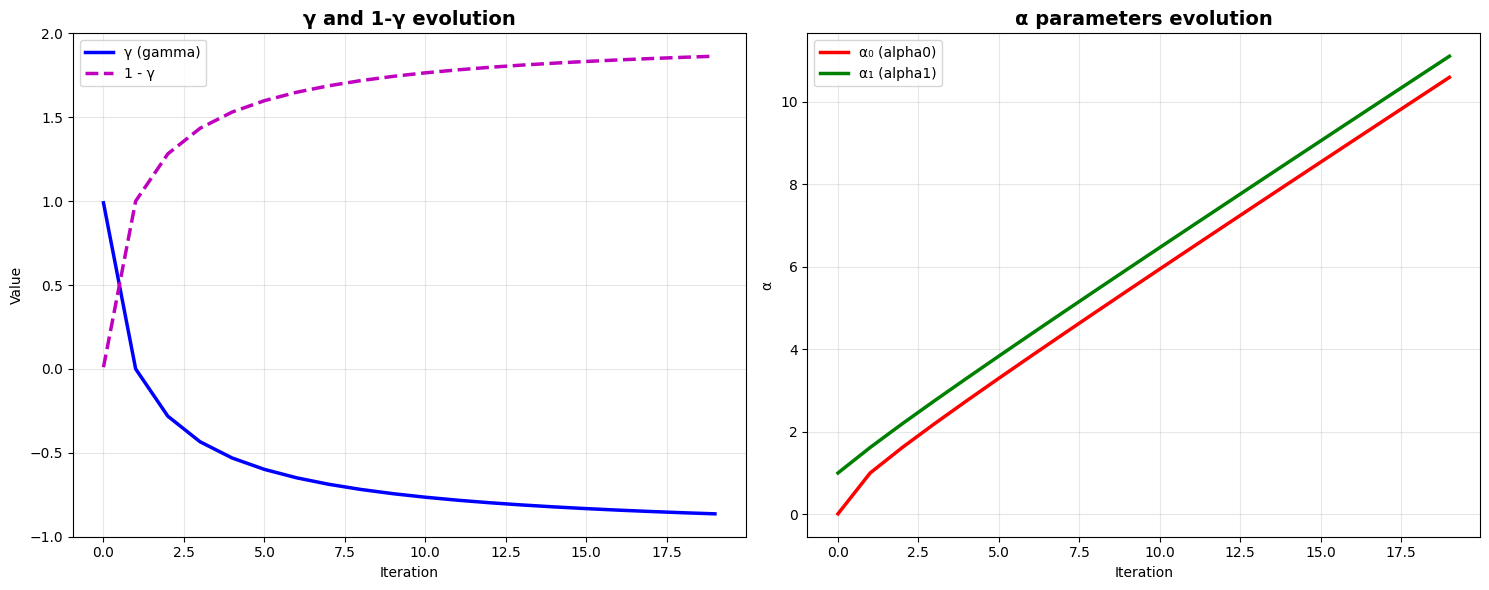

In [9]:
def plot_idash_evolution(iterations):
    updater = NAGUpdater(version='idash', alpha0=alpha0)
    
    gammas = []
    one_minus_gammas = []
    alphas0 = []
    alphas1 = []
    
    for _ in range(iterations):
        gamma = updater.update()
        gammas.append(gamma)
        one_minus_gammas.append(1 - gamma)
        alphas0.append(updater.params['alpha0'])
        alphas1.append(updater.params['alpha1'])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1.plot(gammas, 'b-', linewidth=2.5, label='γ (gamma)')
    ax1.plot(one_minus_gammas, 'm-', linewidth=2.5, label='1 - γ', linestyle='--')
    ax1.set_title('γ and 1-γ evolution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Value')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    ax2.plot(alphas0, 'r-', linewidth=2.5, label='α₀ (alpha0)')
    ax2.plot(alphas1, 'g-', linewidth=2.5, label='α₁ (alpha1)')
    ax2.set_title('α parameters evolution', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('α')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

plot_idash_evolution(20)


## iDASH corrected momentum

In [10]:
alpha0 = 1.0

/tmp/ipykernel_15973/4281425184.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "m-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(one_minus_gammas, 'm-', linewidth=2.5, label='1 - γ', linestyle='--')


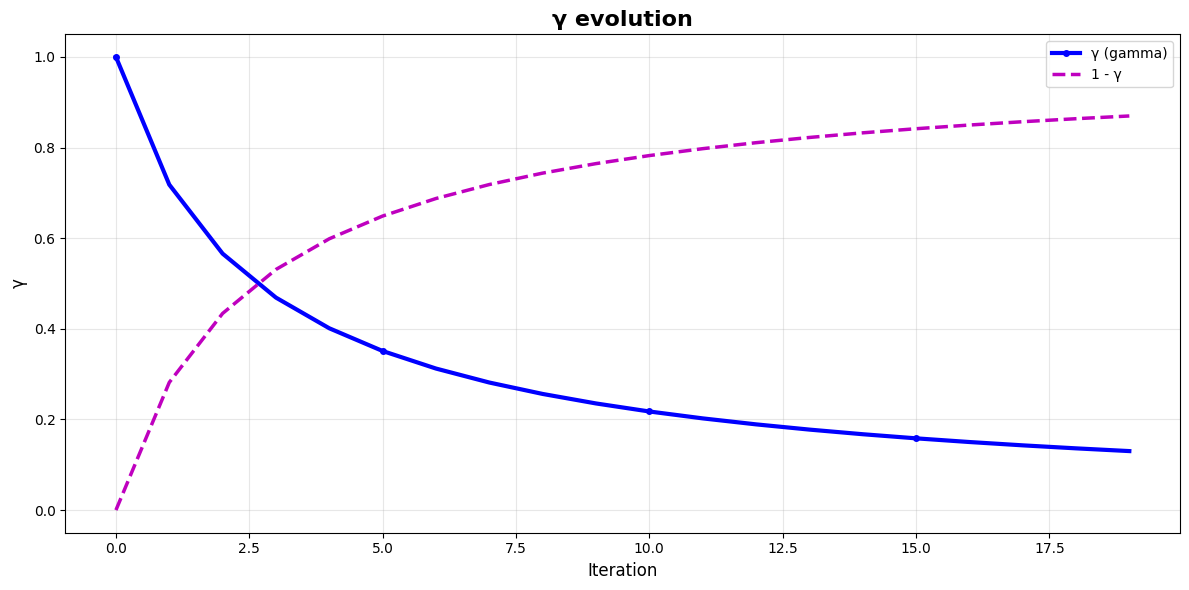

In [11]:
def plot_idash_correct_evolution(iterations=100):
    updater = NAGUpdater(version='idash_correct', alpha0=alpha0)
    
    gammas = []
    one_minus_gammas = []
    for _ in range(iterations):
        gamma = updater.update()
        gammas.append(gamma)
        one_minus_gammas.append(1 - gamma)
    
    plt.figure(figsize=(12, 6)) 
    plt.plot(gammas, 'b-', linewidth=3, label='γ (gamma)', marker='o', markersize=4, markevery=5)
    plt.plot(one_minus_gammas, 'm-', linewidth=2.5, label='1 - γ', linestyle='--')
    plt.title('γ evolution', fontsize=16, fontweight='bold')
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('γ', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_idash_correct_evolution(20)


## Comparaison

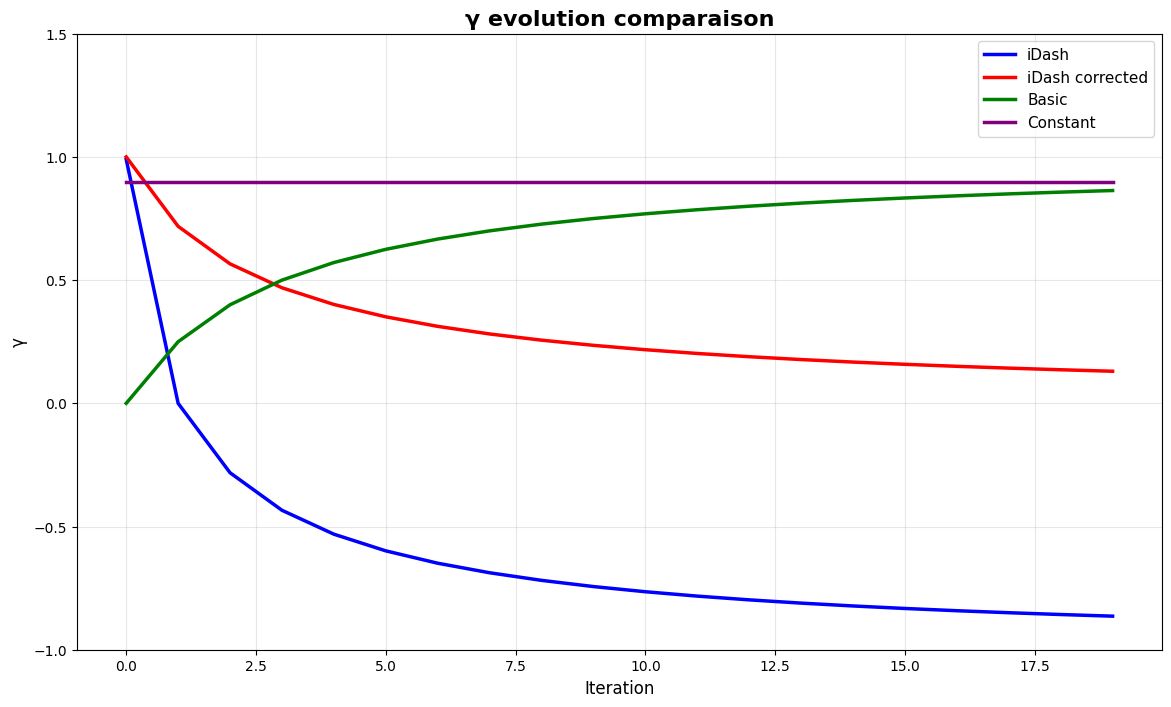

In [12]:
import seaborn as sns
import math

# 3. Graphique comparatif de tous les gamma
def plot_all_gammas_comparison(iterations=100):
    versions = ['idash', 'idash_correct', 'basic', 'constant']
    colors = ['blue', 'red', 'green', 'purple']
    labels = ['iDash', 'iDash corrected', 'Basic', 'Constant']
    
    plt.figure(figsize=(14, 8))
    
    for version, color, label in zip(versions, colors, labels):
        if version == 'idash':
            alpha0 = 0.01
        else:
            alpha0 = 1.0
        updater = NAGUpdater(version=version, gamma_cst=0.9, alpha0=alpha0)
        gammas = []
        for _ in range(iterations):
            gammas.append(updater.update())
        
        plt.plot(gammas, color=color, linewidth=2.5, label=label)
    
    plt.title('γ evolution comparaison', fontsize=16, fontweight='bold')
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('γ', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11)
    plt.ylim(-1, 1.5)
    
    plt.show()

plot_all_gammas_comparison(20)